<img src="https://github.com/Team-predicting-football-salary/Pigskin_Paydays/blob/main/images/title.png?raw=true">

# Project Goal 
> To predict what percentage of a Teams overall budget will be paid to the quarterback given his statistics

# Project Description
> This project uses statistics for NFL quarterbacks across the entire league dating back to 2011 using data from multiple websites. That data was then explored for correlation and sent into models to create a predictive model for our goal.

# Initial Hypotheses

We believe that the following factors will play a major role in deciding a quarterback's percentage cap:

> - Whether players are able to extend the season of their team, i.e. lead them to the playoffs
> - More yards and touchdowns = Higher percentages
> - More interceptions will negatively affect the percentage cap
> - Higher passer ratings will lead to higher percentages

# Imports

In [1]:
# from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import os
# from scipy import stats
# from sklearn.model_selection import train_test_split
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import RobustScaler
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import QuantileTransformer
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error
# from sklearn.metrics import r2_score
# from sklearn.linear_model import LassoLars
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import TweedieRegressor
import wrangle
import warnings
warnings.filterwarnings("ignore")
# from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector
# from pydataset import data
# from sklearn.linear_model import LinearRegression
# import random
# random.seed(10)

2023-07-21 15:24:51.791167: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Acquire
> * Data acquired from:
    - <a href="https://overthecap.com/position/quarterback">Over the Cap: Positions</a>
    - <a href="https://overthecap.com/contract-history/quarterback">Over the Cap: Contract History</a>
    - <a href="https://www.pro-football-reference.com/years/2022/passing.htm">Pro-Football Reference: Stats</a>
    - <a href="https://www.sportskeeda.com/">(For NLP portion) Sportskeeda</a>
    - <a href="https://www.nfl.com/schedules/2022/POST1/">NFL: Playoff Schedule</a>
> * Combined multiple csv's and added column for percentage of wins and losses
> * Cached combined file to local csv
> * Each row is one quarterback's stats for a specific year

In [2]:
#Import file

df = pd.read_csv('last_csv.csv',index_col=[0])

In [3]:
#Check how file was imported

df.head()

team  year  games_played   comp    att  comp_pct     yds  \
name                                                                      
Blaine Gabbert  JAX  2011          15.0  210.0  413.0      50.8  2214.0   
Blaine Gabbert  JAX  2012          10.0  162.0  278.0      58.3  1662.0   
Blaine Gabbert   SF  2015           8.0  178.0  282.0      63.1  2031.0   
Blaine Gabbert   SF  2016           6.0   91.0  160.0      56.9   925.0   
Blaine Gabbert  ARI  2017           5.0   95.0  171.0      55.6  1086.0   

                avg_yds_per_att    td   int  ...  loss  wild_card  div_rnd  \
name                                         ...                             
Blaine Gabbert              5.4  12.0  11.0  ...    10        0.0      0.0   
Blaine Gabbert              6.0   9.0   6.0  ...     9        0.0      0.0   
Blaine Gabbert              7.2  10.0   7.0  ...     5        0.0      0.0   
Blaine Gabbert              5.8   5.0   6.0  ...     4        0.0      0.0   
Blaine Gabbert              6.4   6.0   6.0  ...     3        0.0      0.0   

                conf_rnd  superbowl superbowl_win  win_perc  loss_perc  \
name                                                                     
Blaine Gabbert       0.0        0.0           0.0      0.27       0.67   
Blaine Gabbert       0.0        0.0           0.0      0.10       0.90   
Blaine Gabbert       0.0        0.0           0.0      0.38       0.62   
Blaine Gabbert       0.0        0.0           0.0      0.17       0.67   
Blaine Gabbert       0.0        0.0           0.0      0.40       0.60   

               td_per_game  sk_per_game  
name                                     
Blaine Gabbert        0.80         2.67  
Blaine Gabbert        0.90         2.20  
Blaine Gabbert        1.25         3.12  
Blaine Gabbert        0.83         1.83  
Blaine Gabbert        1.20         4.60  

[5 rows x 41 columns]

# Prepare
> * Conducted univariate exploration on full dataset to detect outliers
> * Outliers that existed were kept
> * Verified datatypes
> * Corrected column names
> * Checked for nulls and removed them
> * Split the data, stratifying on target variable

# Univariate Analysis

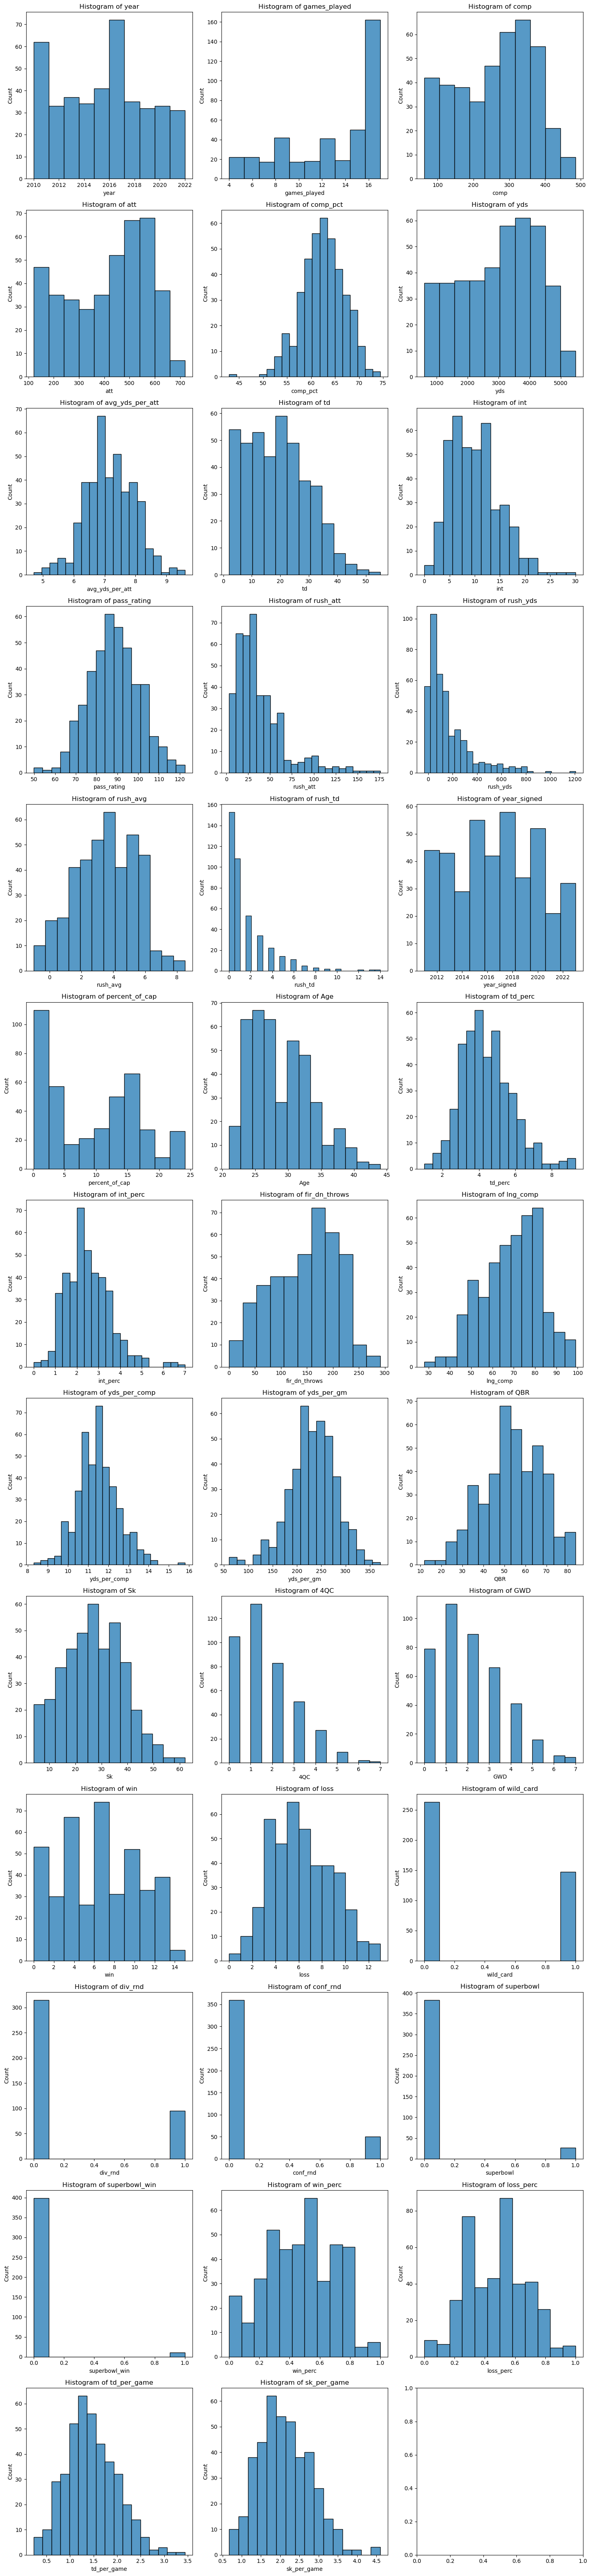

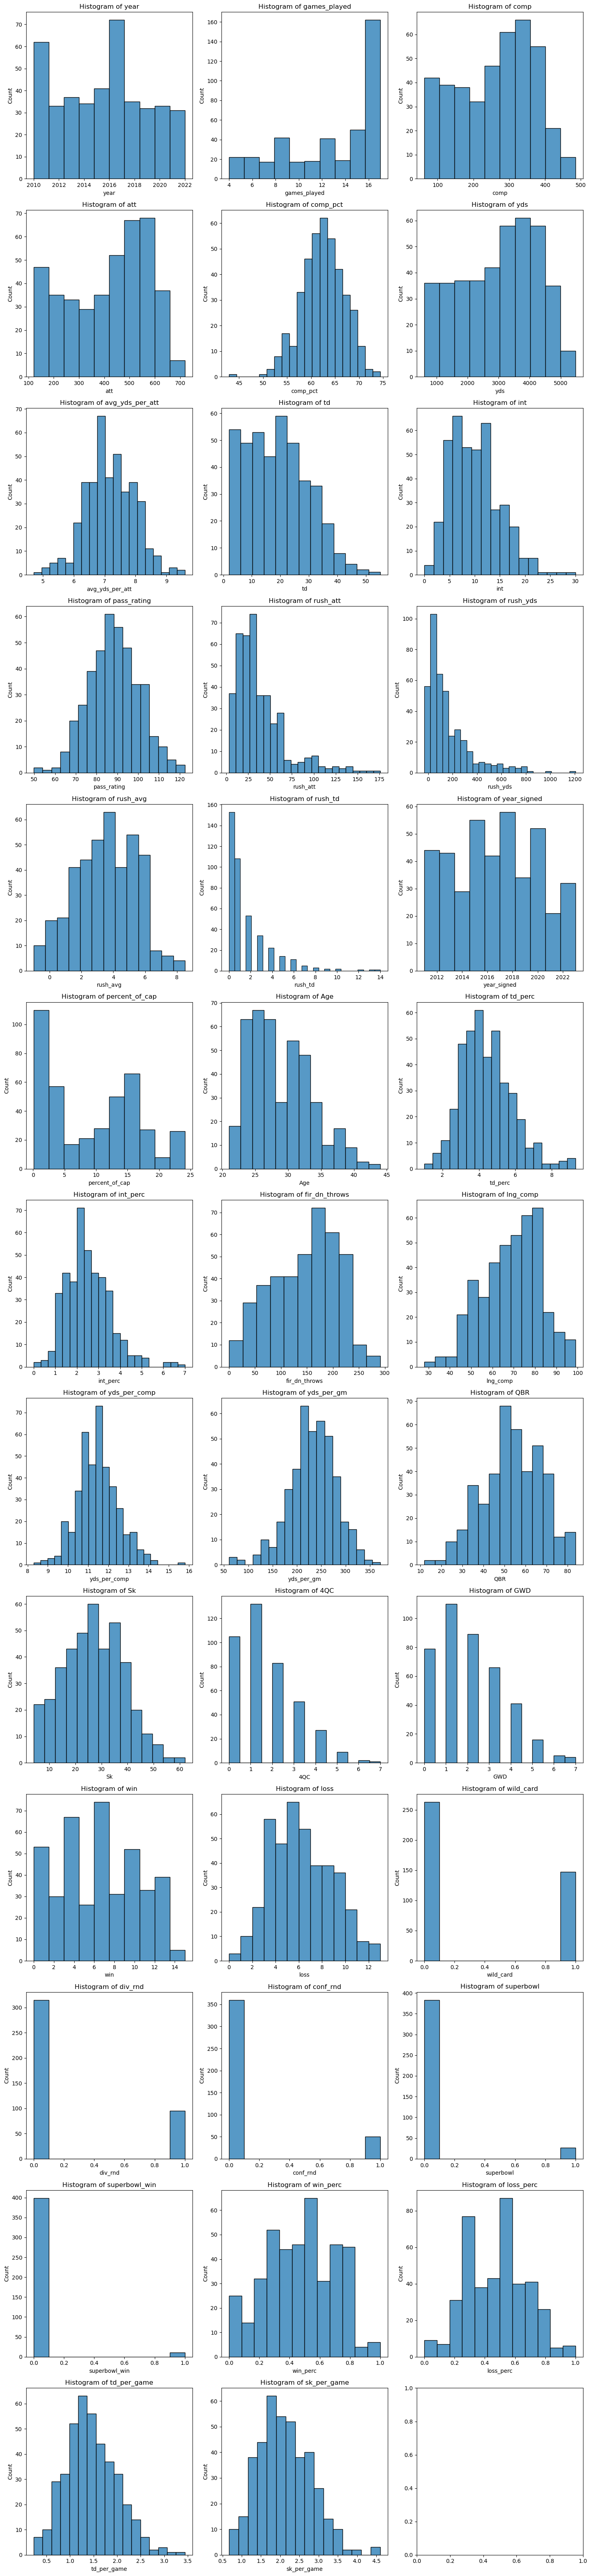

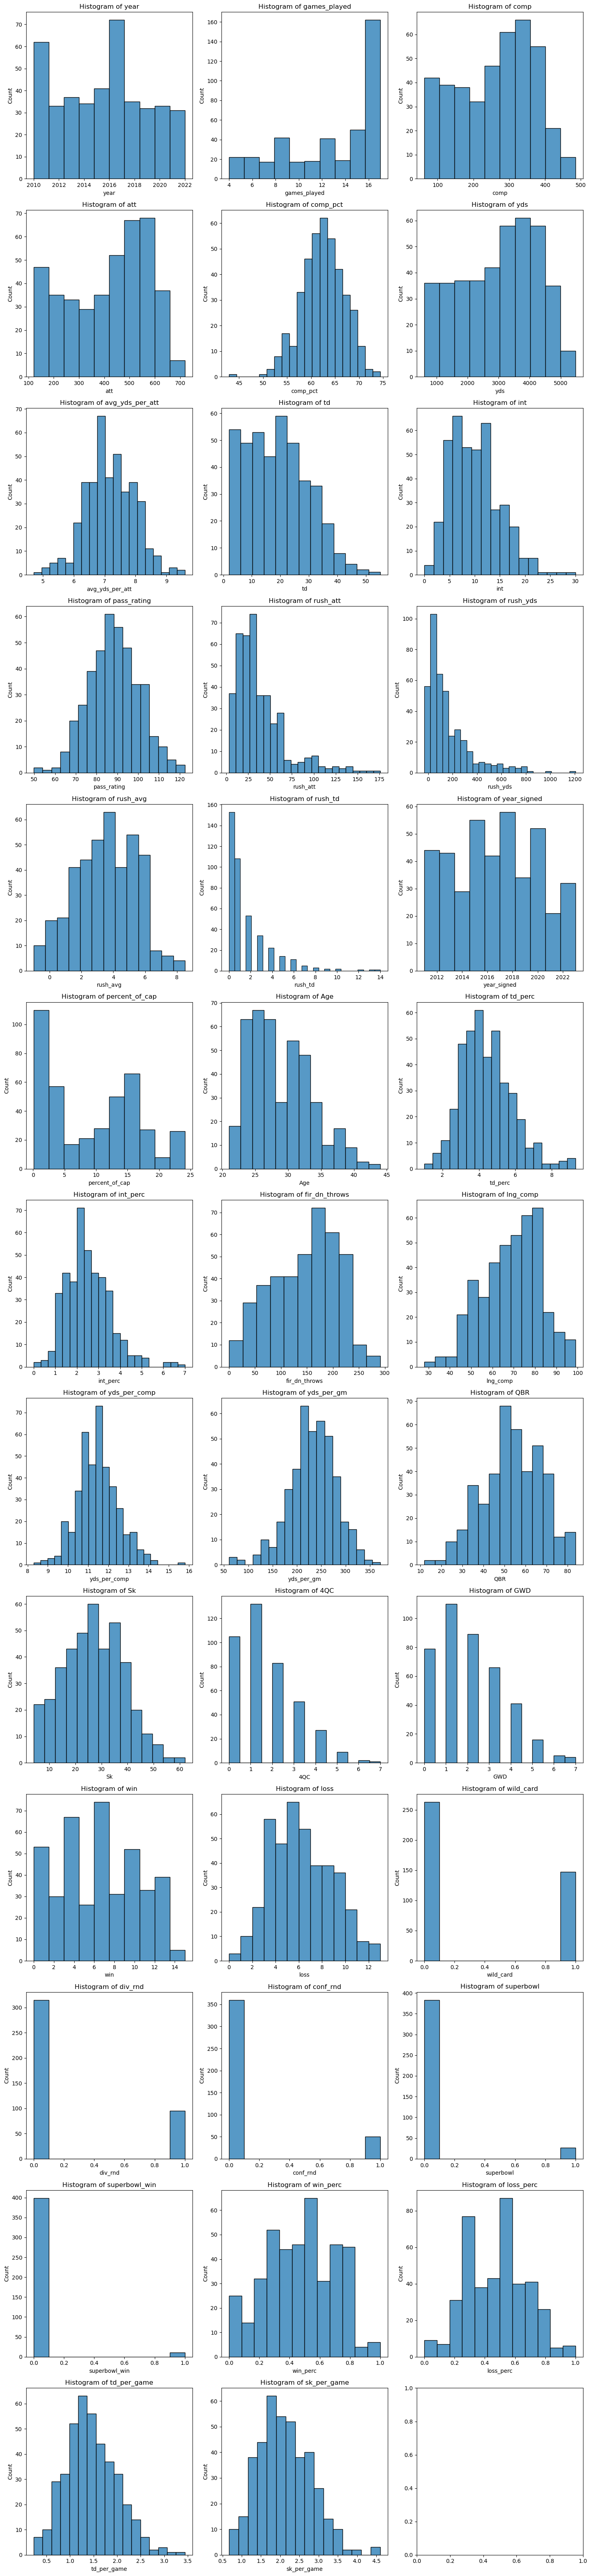

In [4]:
#Function to present histograms of individual variables in subplots

wrangle.new_visual_univariate_findings(df)

# Univariate Exploration Summary


After exploration, most of the continuous variables were normally distributed (we'll keep these in mind during correlation testing). The outliers that we did detect we decided to keep in the dataset, since outliers do have a major effect on percentage cap.

# Bivariate Exploration

In [5]:
#Splitting data

train, validate, test = wrangle.split_data(df)

In [6]:
#Prepping dataset for bivariate analysis

columns_list, target, corr_test = wrangle.get_target_and_columns(df, train)

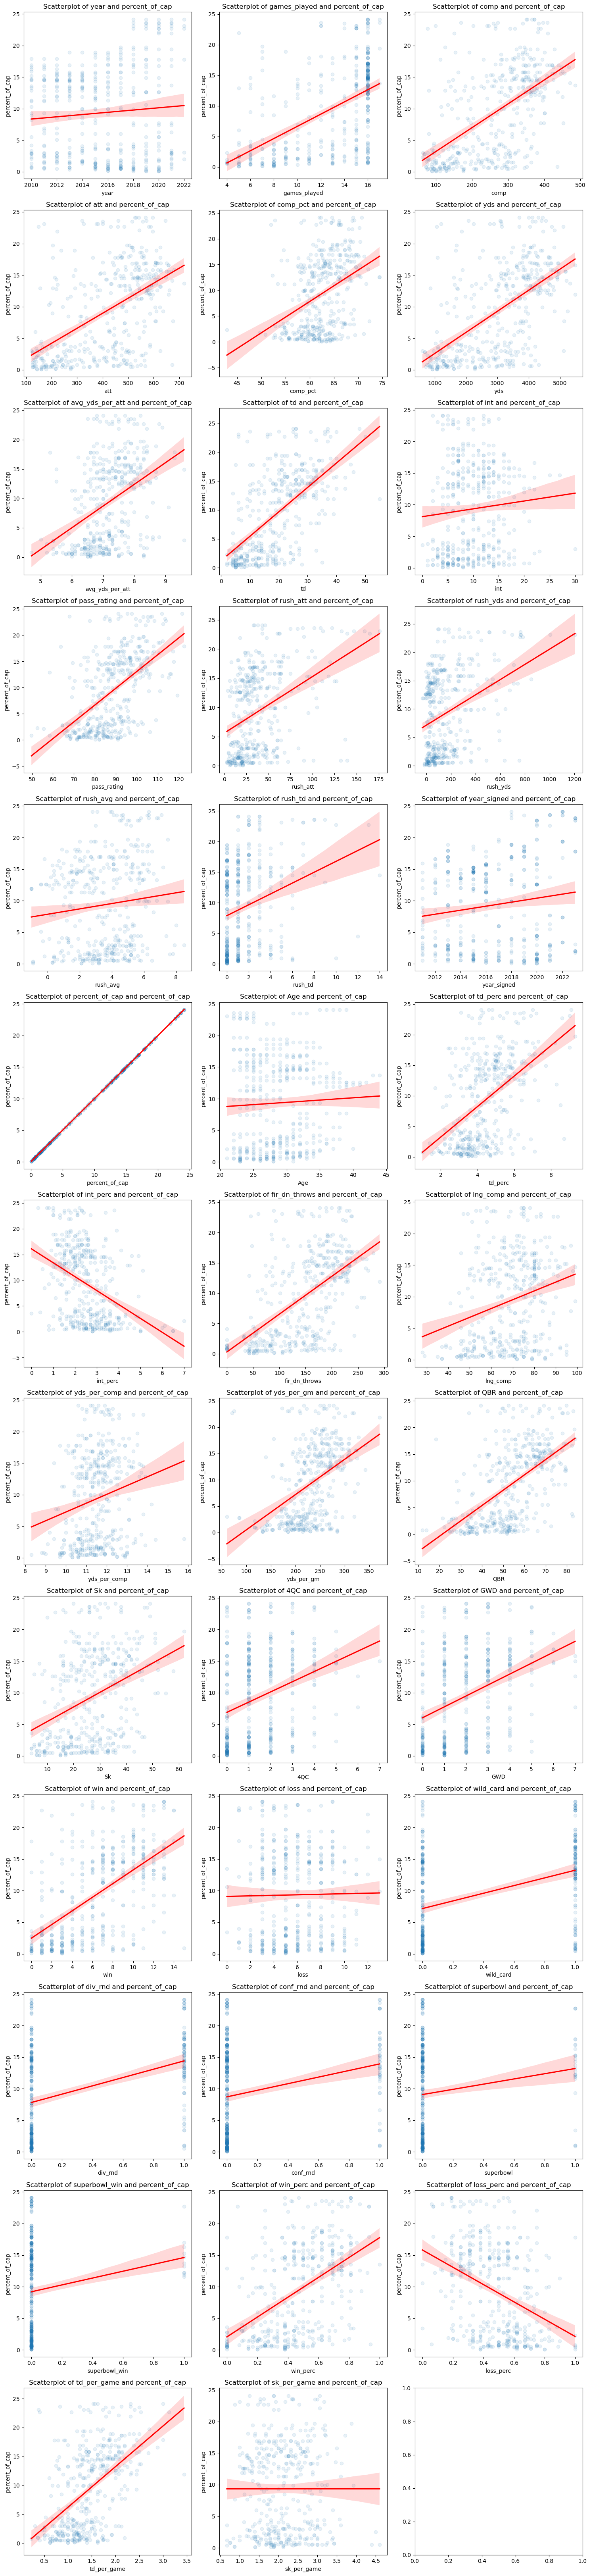

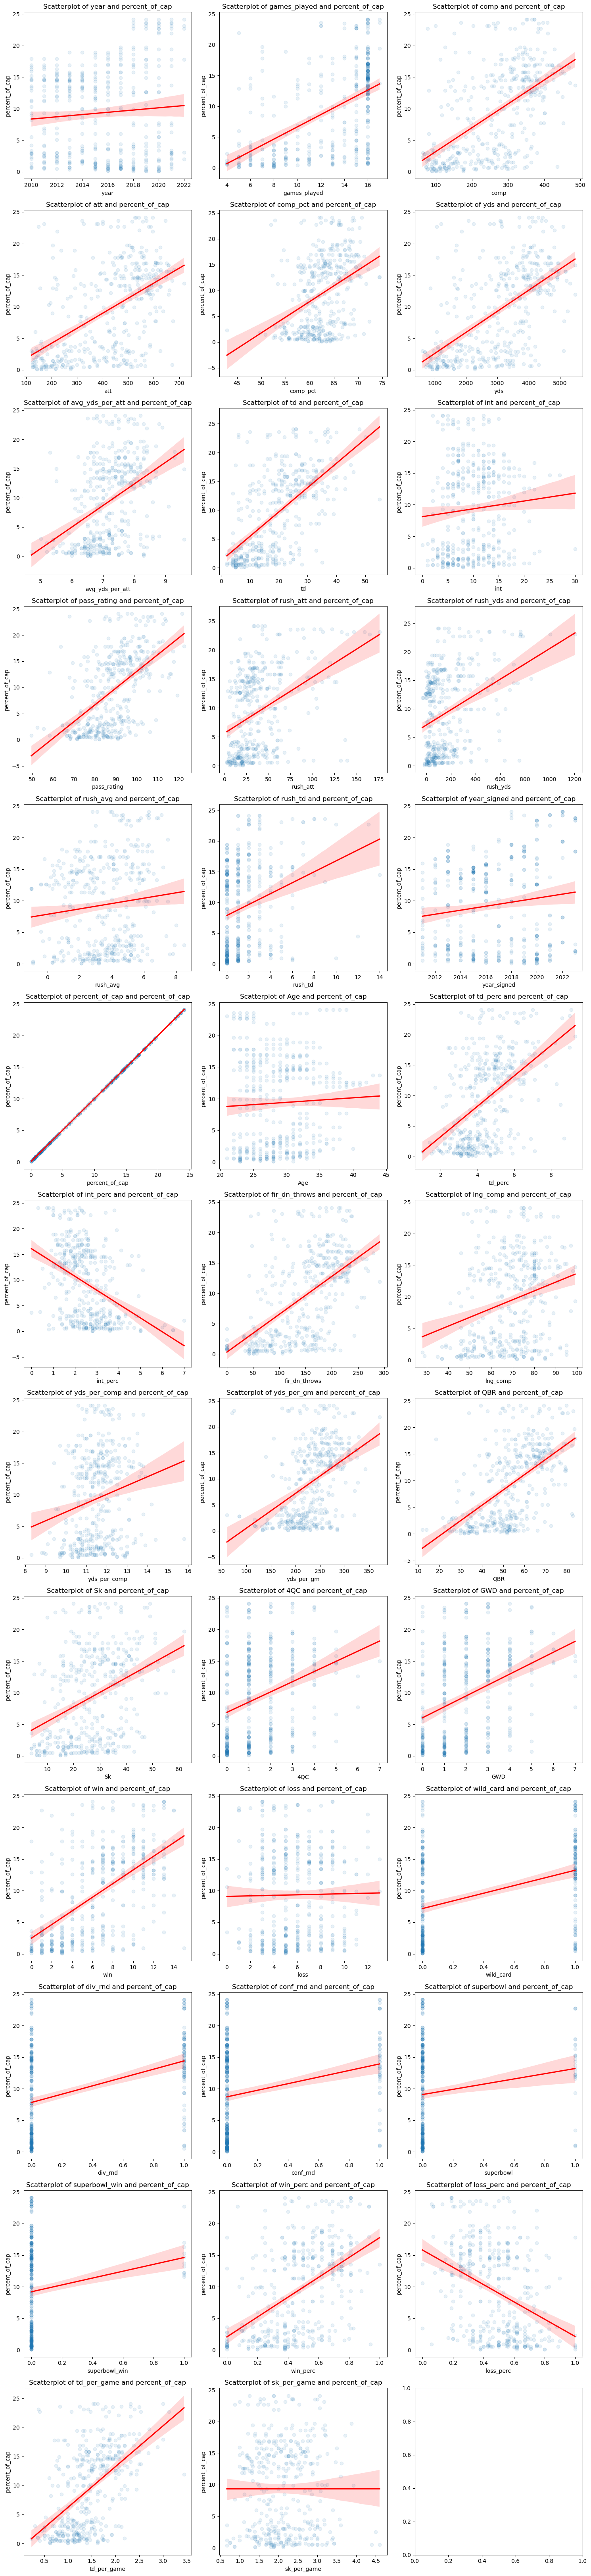

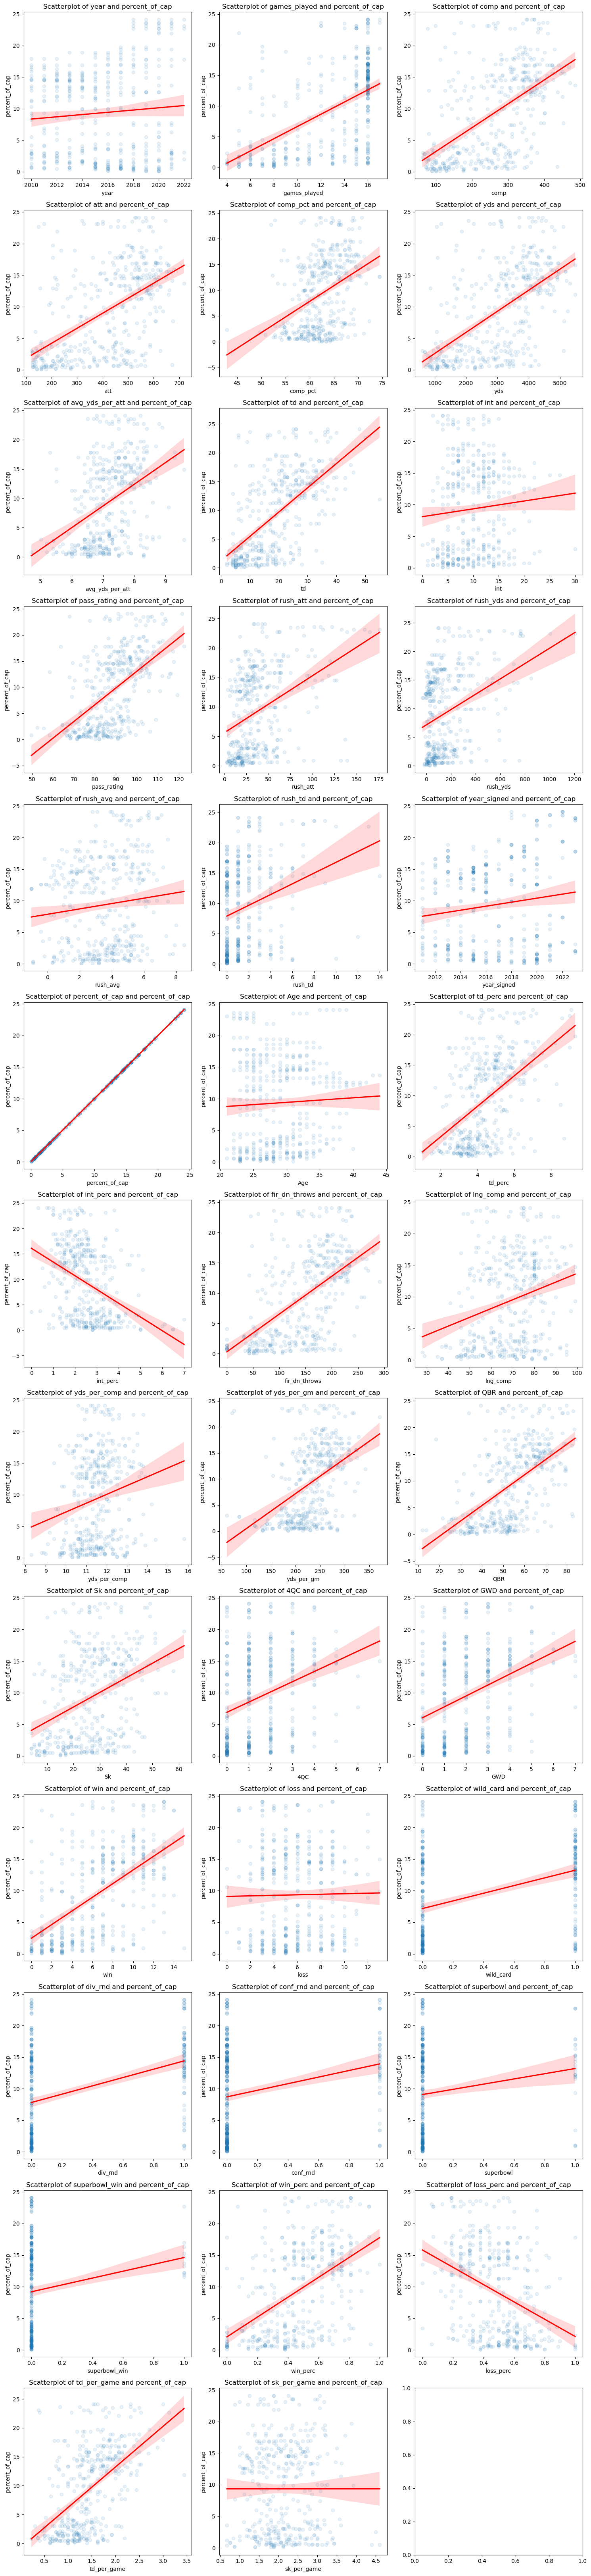

In [7]:
#Visualizing how variables relate to target variable.

wrangle.new_visual_multivariate_findings(df, target)

# Bivariate Exploration Summary


$H_0$: There is no correlation between our selected features and our target variable.

$H_\alpha$: There is a correlation between our selected features and our target variable.

$\alpha$: 0.05

In [8]:
#Running correlation tests across all continuous variables

corr_test.sort_values(by= 'p')

feature         r             p Moving Forward
36              win  0.620792  1.323882e-27            Yes
35               td  0.601081  1.486490e-25            Yes
34              yds  0.574484  5.292411e-23            Yes
33    fir_dn_throws  0.563590  5.050176e-22            Yes
32              QBR  0.563277  5.381325e-22            Yes
31             comp  0.556350  2.160952e-21            Yes
30     games_played  0.554204  3.302561e-21            Yes
29         win_perc  0.550116  7.346897e-21            Yes
28      pass_rating  0.540268  4.823076e-20            Yes
27              att  0.525681  7.010624e-19            Yes
26      td_per_game  0.496342  1.049815e-16            Yes
25          td_perc  0.480662  1.261201e-15            Yes
24        wild_card  0.475994  2.580610e-15            Yes
23        loss_perc -0.434444  9.549557e-13            Yes
22          div_rnd  0.434338  9.685576e-13            Yes
21         rush_att  0.432117  1.299444e-12            Yes
20  avg_yds_per_att  0.415561  1.087772e-11            Yes
19       yds_per_gm  0.415388  1.111615e-11            Yes
18         comp_pct  0.399864  7.345001e-11            Yes
17         int_perc -0.393903  1.478336e-10            Yes
16               Sk  0.379545  7.534710e-10            Yes
15              GWD  0.378387  8.562896e-10            Yes
14         rush_yds  0.363962  4.042787e-09            Yes
13         lng_comp  0.306278  9.705150e-07            Yes
12              4QC  0.298670  1.843003e-06            Yes
11         conf_rnd  0.264205  2.697335e-05            Yes
10          rush_td  0.262647  3.020067e-05            Yes
9      yds_per_comp  0.190986  2.629944e-03            Yes
8       year_signed  0.165629  9.253253e-03            Yes
7     superbowl_win  0.116044  6.922477e-02             No
6         superbowl  0.115471  7.061938e-02             No
5               int  0.092989  1.458897e-01             No
4              year  0.089757  1.604850e-01             No
3          rush_avg  0.081068  2.051141e-01             No
2              loss -0.030341  6.358103e-01             No
1               Age  0.019675  7.588122e-01             No
0       sk_per_game -0.014776  8.176378e-01             No

In [9]:
#Adjusting columns_list to only include columns we want to move forward with in our modeling

columns_list = corr_test.feature[corr_test.p < .05].to_list()

### Additional Insights from NLP

In [10]:
#Acquire and Prepare

comm = wrangle.acquire_commentary()
comm.player_commentary = comm.player_commentary.apply(wrangle.clean_strings)

comm.head()

player_name  year  \
0   Aaron Rodgers  2022   
1      Alex Smith  2018   
2     Andrew Luck  2016   
3     Andy Dalton  2022   
4  Baker Mayfield  2022   

                                                                           player_commentary  \
0  rank aaron rodger top 5 playoff performance aaron rodger one great quarterback nfl his...   
1  nfl 5 takeaway washington week 14 win 49er notorious nfc east division turn head washi...   
2  fan react andrew luck appearance bulldog vs alabama title game andrew luck retirement ...   
3  team andy dalton play nfl journey saint veteran qb explore andy dalton currently play ...   
4  nfl fan react yet another interceptionladen performance baker mayfield packer baker ma...   

   percent_of_cap  tier  
0            24.1  high  
1            13.3  high  
2            15.8  high  
3             1.4   low  
4             7.4   mid

In [11]:
# Get grams to put into visualizations

unigram_high_words, unigram_mid_words, unigram_low_words, bi_tri_high_words, bi_tri_mid_words, bi_tri_low_words = wrangle.get_grams(comm)

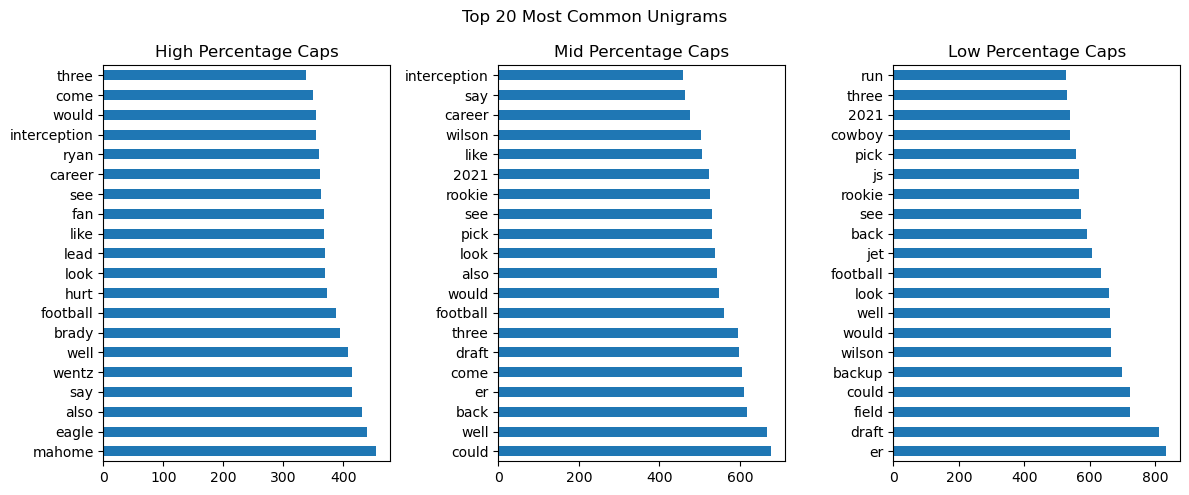

In [12]:
#Unigram visualizations

wrangle.viz_unigrams(unigram_high_words, unigram_mid_words, unigram_low_words)

### Key Findings

- 'Career' is not mentioned in low-percentage caps.
- High-percentage caps have a larger set of unique words. A lot of them could be comparisons to "the Greats" (Mahomes, Hurts, Wentz, Brady).
- Low-percentage caps talked a lot about backup (presumably quarterbacks), field, and run. Mention of "Jets" indicate historically low-percentage cap quarterbacks.

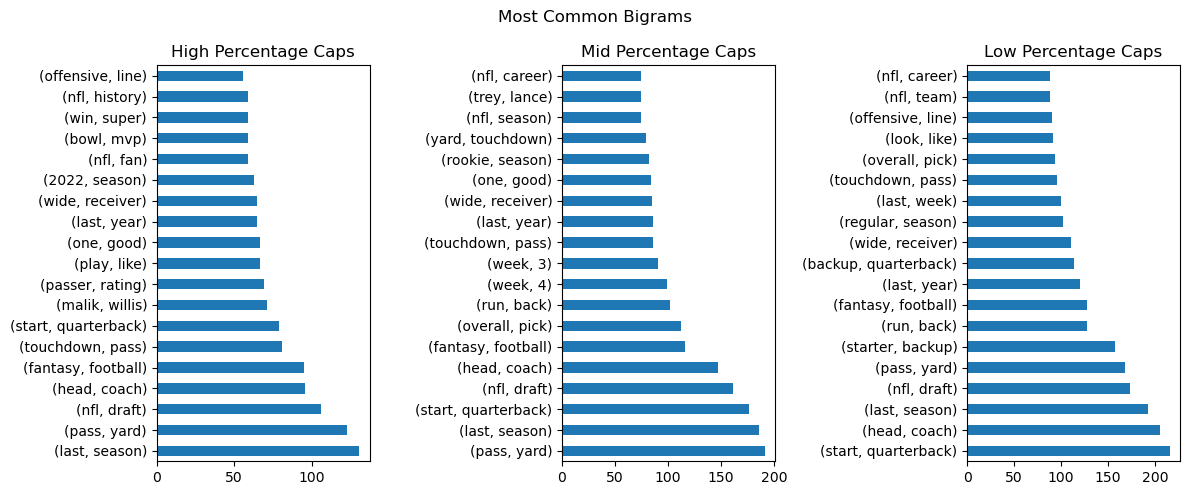

In [13]:
#Bigram visualizations

wrangle.viz_bigrams(bi_tri_high_words, bi_tri_mid_words, bi_tri_low_words)

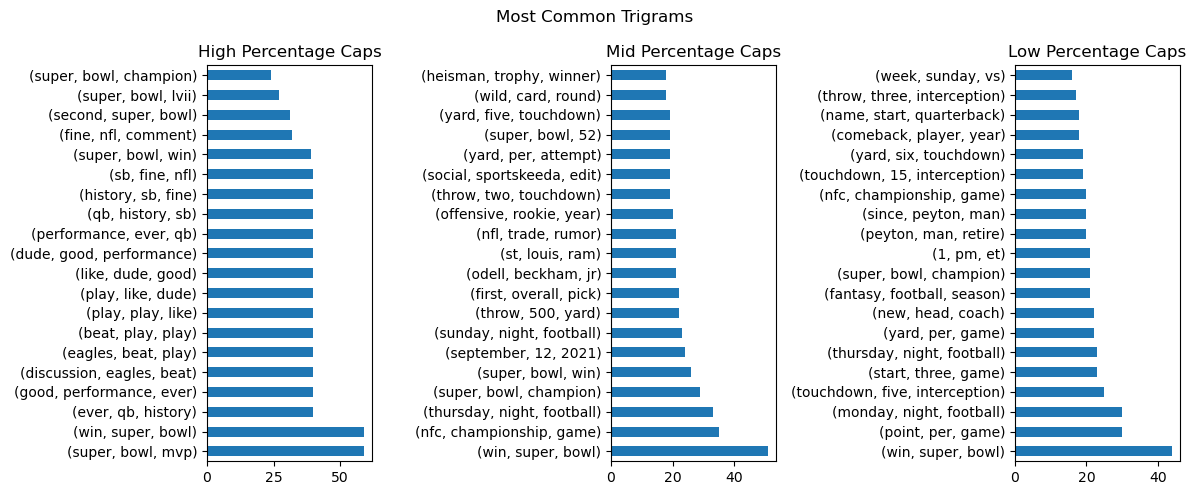

In [14]:
#Trigram visualizations

wrangle.viz_trigrams(bi_tri_high_words, bi_tri_mid_words, bi_tri_low_words)

### Key Findings

- The conversation always revolves around winning the Super Bowl across all three cap tiers.
- High-percentage caps talk about the Super Bowl and their performance in it significantly more. The focus of mid and low percentage caps also speak about their performance in the NFC.

### Sentiment Analysis

In [15]:
#Get Sentiment Scores

wrangle.get_sia_scores(comm)

year  percent_of_cap  sentiment
tier                                        
high  2020.000000       18.765000   0.999895
low   2019.676471        1.008824   0.913597
mid   2019.880000        5.800000   0.999960

### Key Findings

- Sentiment scores are very high, if not maxed out, across all tiers. Only the low-percentage cap quarterbacks had a slightly lower score.
- Because the sentiment scores are so similar, we will not be moving forward with this feature in modeling.

# Modeling

Since our target variable (percentage of cap) is continuous, we will use RMSE as our evaluation metric

**Baseline RMSE** = 7.1

We retrieved the RMSE by using the mean of all percentage caps as the baseline, and calculated the root mean square error for all data points.

In [16]:
# Splitting the data in its respective categories
X_train, X_validate, X_test, y_train, y_validate, y_test = wrangle.get_X_train_val_test(train,validate, test, columns_list,target)

In [17]:
# Scaling on selected features to be sent into model
X_train, X_validate, X_test = wrangle.scale_data(X_train, X_validate,X_test,cols = columns_list)

In [18]:
# Running the data through the models
df1, df2, df3, predict_linear, feature_weights, predict_linear_test  = wrangle.get_model_numbers(X_train, X_validate, X_test, y_train, y_validate, y_test)

In [19]:
train['predicted'] = predict_linear.tolist()

# Looking at predicted vs actual for a given year

In [20]:
train[['predicted','percent_of_cap', 'year']].sort_values(by=['percent_of_cap','year'], ascending = False).head()

predicted  percent_of_cap  year
name                                          
Aaron Rodgers   9.621794            24.1  2022
Aaron Rodgers  19.618208            24.1  2020
Aaron Rodgers  16.053070            24.1  2019
Josh Allen     19.822399            23.6  2021
Josh Allen     18.244566            23.6  2020

## Train Data

In [21]:
# Models on the training data
df1

model_train      rmse        r2
0                        baseline  7.105761  0.000000
1     ordinary least squared(OLS)  4.714900  0.559725
2                lasso lars(lars)  7.105761  0.000000
3    Polynomial Regression(poly2)  0.032821  0.999979
4  Generalized Linear Model (GLM)  5.431917  0.415634
5         Random Forest Regressor  1.863989  0.931188

## Validate Data

In [22]:
# Models on the validate data
df2

model_validate          rmse            r2
0                        baseline  7.105761e+00  0.000000e+00
1     ordinary least squared(OLS)  5.261772e+00  4.079147e-01
2                lasso lars(lars)  6.953167e+00 -3.391664e-02
3    Polynomial Regression(poly2)  3.784017e+06 -3.062149e+11
4  Generalized Linear Model (GLM)  5.456702e+00  3.632329e-01
5         Random Forest Regressor  4.856398e+00  4.956305e-01

Although the GLM model had the smallest difference between the train and validate sets, we went with OLS because it had lower scores overall.

## Test Data

In [23]:
# Model on the unseen test data
df3

model_validate      rmse        r2
0                     baseline  7.105761  0.000000
1  ordinary least squared(OLS)  5.735874  0.434417

Our model beat the baseline by 1.4 points.

# Modeling Summary
> - Our ordinary least squared(OLS) performed best with an RMSE score of 5.74 in our unseen data.
> - Our unseen test data beat baseline by 1.4 points.

# Conclusion

> - Given our domain expertise, we were able to confirm that a lot of factors that affect a quarterback's percentage cap actually comes from those intangible (and non-measurable) attributes of a quarterback, such as leadership skills, presence in lockerroom, etc.
> - Our model was able to beat the baseline by 1.4 points, so we recommend using our model as a starting point in negotiations.

# Recommendations
> - For those intangible attributes, we recommend finding ways to quantify those qualitative attributes. I.e. scores on behavioral interviews, Wonderlic tests, etc.

# Next Steps
> - Run throught the entire pipeline with different positons other than just quarterback